In [487]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [488]:
#Read csv into a pandas dataframe.
csv = 'move_est.csv'
df = pd.read_csv(csv, index_col = 'order_id')
df.describe()

,fs,move_length_hours,executed_man_hours,booked_man_hours,order_total_spots,house,residence,rooms,coupon_amount,min_billable_man_hours,...,pop_density,phone,add_hops,over,hours_between_waypoints,hour_of_day,morning,day_of_week,weekend,lead_days
count,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000,...,7167.000000,7167.000000,7167.000000,7167.000000,3558.000000,7167.000000,7167.000000,7167.000000,7167.000000,7167.000000
mean,0.470071,2.460066,5.784150,5.715362,2.157388,0.367378,0.911399,1.589647,29.152626,2.940142,...,3349.172052,0.459327,0.171759,0.303614,0.049480,16.826845,0.050928,3.394307,0.535510,9.106879
std,0.499138,1.700810,4.522119,3.568815,0.479625,0.482124,0.284186,0.902763,97.502333,0.998277,...,2080.616545,0.498378,0.457755,0.459850,0.132990,3.634964,0.219866,1.942650,0.498772,10.577651
min,0.000000,0.006944,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1295.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.167778,3.000000,4.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,1400.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000,0.000000,2.000000
50%,0.000000,2.123333,4.500000,4.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,3284.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,4.000000,1.000000,5.000000
75%,1.000000,3.299861,7.000000,6.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,...,4985.900000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,5.000000,1.000000,12.000000
max,1.000000,13.416667,79.750000,56.000000,7.000000,1.000000,1.000000,5.000000,3450.500000,4.000000,...,11898.300000,1.000000,5.000000,1.000000,1.333333,23.000000,1.000000,6.000000,1.000000,145.000000


30 % of moves run over 3 hours.


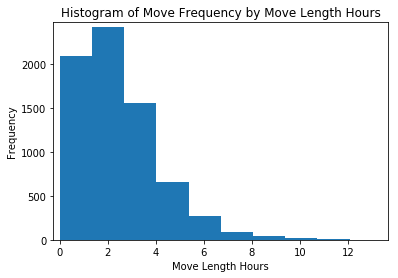

In [489]:
#Percent of moves over 3hr threshold
perc_over = round(np.mean(df.over)*100)
print(perc_over,"% of moves run over 3 hours.")

#Histogram of frequency of move lengths
plt.hist(df.move_length_hours)
plt.title('Histogram of Move Frequency by Move Length Hours')
plt.xlabel('Move Length Hours')
plt.ylabel('Frequency')
plt.margins(.02)
plt.show()

In [490]:
#Bellhops knows that full service moves tend to be longer than labor only moves, but by how much?
df['move_length_hours'].groupby(df['fs']).describe()

,count,mean,std,min,25%,50%,75%,max
fs,,,,,,,,
0,3798.0,1.613185,1.226130,0.006944,0.765625,1.316667,2.140694,12.074167
1,3369.0,3.414786,1.655116,0.265000,2.233333,3.083333,4.210278,13.416667


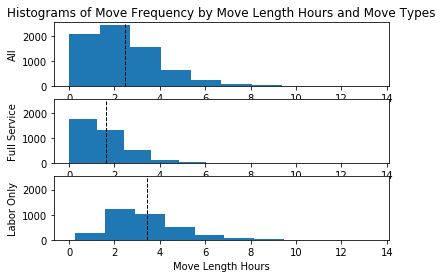

In [491]:
#What does move length distributions look like by move type?
ax1 = plt.subplot(3,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by Move Length Hours and Move Types')
plt.ylabel('All')

plt.subplot(3,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.fs==0])
plt.axvline(df.move_length_hours[df.fs==0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Full Service')

plt.subplot(3,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.fs==1])
plt.axvline(df.move_length_hours[df.fs==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Labor Only')
plt.xlabel('Move Length Hours')

plt.show()

In [492]:
#How much more likely are full service moves to go over the threshold than labor only moves?
df['over'].groupby(df['fs']).mean()

fs
0    0.111638
1    0.520036
Name: over, dtype: float64

In [493]:
#For moves than run over the threshold, what % are also more than a man hour over what was booked? (This causes serious customer frustration.)
df_over = df[df['over']==1]
df_over['bad'] = np.where(df_over.executed_man_hours - df_over.booked_man_hours >= 1,1,0)
df_over['bad'].mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.6043198529411765

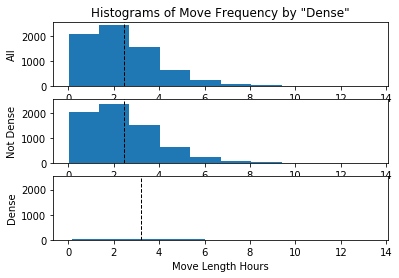

In [494]:
#Bellhops thinks that moves take longer in it's most densely populated cities
ax1 = plt.subplot(3,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by "Dense"')
plt.ylabel('All')

plt.subplot(3,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.dense==0])
plt.axvline(df.move_length_hours[df.dense==0].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Not Dense')

plt.subplot(3,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.dense==1])
plt.axvline(df.move_length_hours[df.dense==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Dense')

plt.xlabel('Move Length Hours')
plt.show()

There might be something there, but there are so few observations in the "dense" bucket.

In [514]:
#Bellhops has a hunch that there are persitent move length differences amoung markets. Here are mean move lengths by market and move type
ml = pd.crosstab(df.market, df.broad_move_type, values=df.move_length_hours, aggfunc=np.mean)

ml.sort_values('full_service',ascending=False)


broad_move_type,full_service,labor_only
market,,
"Washington D.C., DC",4.336386,1.833169
"Pittsburgh, PA",3.873139,1.712393
"Birmingham, AL",3.798604,1.797549
"Knoxville, TN",3.790292,1.468284
"Saint Louis, MO",3.778014,1.776290
"Atlanta, GA",3.601149,1.777764
"Kansas City, MO",3.577977,1.583343
"Indianapolis, IN",3.534306,1.633173
"Dallas-Fort-Worth, TX",3.397688,1.576839


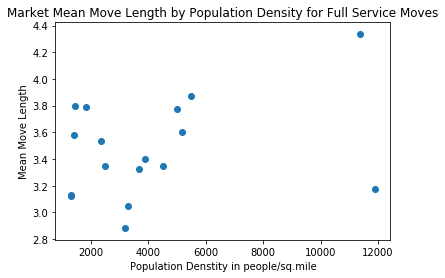

In [515]:
#Are these market specific differences driven by population density?
pop = pd.DataFrame(df['pop_density'].groupby(df['market']).mean())
ml_pop = ml.join(pop)

plt.scatter(ml_pop.pop_density,ml_pop.full_service)
plt.title('Market Mean Move Length by Population Density for Full Service Moves')
plt.xlabel('Population Denstity in people/sq.mile')
plt.ylabel('Mean Move Length')
plt.show()


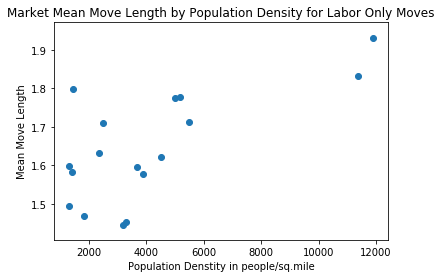

In [516]:
plt.scatter(ml_pop.pop_density,[ml_pop.labor_only])
plt.title('Market Mean Move Length by Population Density for Labor Only Moves')
plt.xlabel('Population Denstity in people/sq.mile')
plt.ylabel('Mean Move Length')
plt.show()


There isn't a plethora of observations, but the labor only scatter plot does suggest a positve correlation between mean move length and population density.

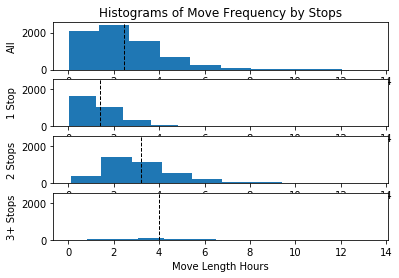

In [519]:
#We think that moves take longer the more stops there are
ax1 = plt.subplot(4,1,1)
plt.hist(df.move_length_hours)
plt.axvline(df.move_length_hours.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histograms of Move Frequency by Stops')
plt.ylabel('All')

plt.subplot(4,1,2,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops==1])
plt.axvline(df.move_length_hours[df.stops==1].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('1 Stop')

plt.subplot(4,1,3,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops==2])
plt.axvline(df.move_length_hours[df.stops==2].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('2 Stops')

plt.subplot(4,1,4,sharex=ax1,sharey=ax1)
plt.hist(df.move_length_hours[df.stops>=3])
plt.axvline(df.move_length_hours[df.stops>=3].mean(), color='k', linestyle='dashed', linewidth=1)
plt.ylabel('3+ Stops')

plt.xlabel('Move Length Hours')
plt.show()

The top three histograms look very similar to the move type histograms. It is interesting to see this 3+ stop difference, although sample size for that group is small.

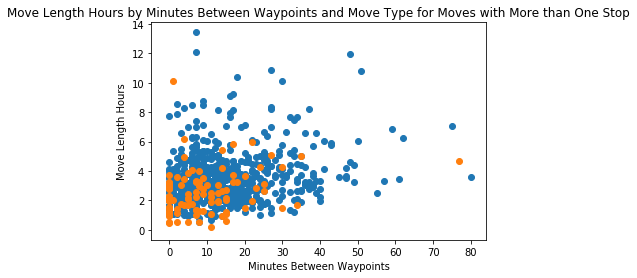

In [523]:
#You would think that drive time between waypoints would directly add to the move length
plt.scatter(df['minutes_between_waypoints'][(df['fs']==1) & (df['stops']>1)],df['move_length_hours'][(df['fs']==1) & (df['stops']>1)])
plt.scatter(df['minutes_between_waypoints'][(df['fs']==0) & (df['stops']>1)],df['move_length_hours'][(df['fs']==0) & (df['stops']>1)])
plt.title('Move Length Hours by Minutes Between Waypoints and Move Type for Moves with More than One Stop')
plt.ylabel('Move Length Hours')
plt.xlabel('Minutes Between Waypoints')
plt.show()

The relationship isn't extremely clear here. Variance/noise caused by other factor swamps the impact visually.

In [524]:
#Is there a relationship between flights of stairs and move length?
df_s = df[df['flights_of_stairs']<6]
df_s['move_length_hours'].groupby([df_s['fs'],df_s['flights_of_stairs']]).describe()

count      mean       std       min       25%  \
fs flights_of_stairs                                                   
0  0                  1706.0  1.610187  1.166217  0.016667  0.814097   
   1                  1331.0  1.505233  1.266141  0.009722  0.650278   
   2                   464.0  1.793118  1.304872  0.006944  0.864514   
   3                   177.0  1.683809  1.253958  0.128889  0.832222   
   4                    64.0  1.978546  1.101025  0.229167  1.150185   
   5                    21.0  2.186865  1.101451  0.878056  1.166667   
1  0                  1205.0  3.176158  1.554251  0.265000  2.040556   
   1                   931.0  3.376613  1.658392  0.466667  2.166667   
   2                   654.0  3.647204  1.724624  0.735278  2.416667   
   3                   289.0  3.689566  1.647235  0.913056  2.487778   
   4                   132.0  3.701137  1.458548  0.682778  2.687292   
   5                    51.0  3.701759  2.098809  1.033333  2.269583   

                           50%       75%        max  
fs flights_of_stairs                                 
0  0                  1.350000  2.148611  11.400000  
   1                  1.139722  2.000000  12.074167  
   2                  1.465417  2.372014  10.000000  
   3                  1.433333  2.066667  10.133333  
   4                  1.895000  2.652639   5.016667  
   5                  2.029167  2.645556   4.714444  
1  0                  2.908611  3.950000  11.915000  
   1                  3.012222  4.135833  11.933333  
   2                  3.250000  4.515764  12.203889  
   3                  3.378889  4.500000   9.983333  
   4                  3.520417  4.506736   9.340833  
   5                  3.250000  4.350000  12.083333

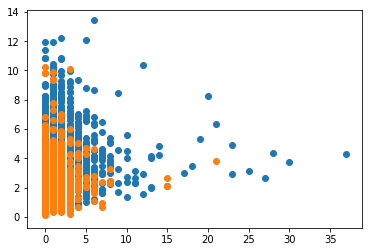

In [525]:
#Scatter for flights of stairs
plt.scatter(df['flights_of_stairs'][(df['fs']==1) & (df['stops']>1)],df['move_length_hours'][(df['fs']==1) & (df['stops']>1)])
plt.scatter(df['flights_of_stairs'][(df['fs']==0) & (df['stops']>1)],df['move_length_hours'][(df['fs']==0) & (df['stops']>1)])
plt.show()

In [527]:
#Is there a relationship between move length and whether or not the move occured in the morning?
df['move_length_hours'].groupby([df['fs'],df['morning']]).describe()

count      mean       std       min       25%       50%  \
fs morning                                                             
0  0        3587.0  1.613244  1.212616  0.006944  0.776111  1.316667   
   1         211.0  1.612190  1.439904  0.033333  0.592500  1.338889   
1  0        3215.0  3.373470  1.616421  0.265000  2.210556  3.050000   
   1         154.0  4.277329  2.152183  1.400000  2.835069  3.785417   

                 75%        max  
fs morning                       
0  0        2.142917  12.074167  
   1        2.102083  11.400000  
1  0        4.166667  12.203889  
   1        5.366667  13.416667

In [528]:
#Is there a relationship between move length and whether or not the move occured over the weekend?
df['move_length_hours'].groupby([df['fs'],df['weekend']]).describe()

count      mean       std       min       25%       50%  \
fs weekend                                                             
0  0        1786.0  1.595473  1.267685  0.030278  0.748681  1.283333   
   1        2012.0  1.628908  1.188122  0.006944  0.799097  1.357778   
1  0        1543.0  3.384433  1.722089  0.265000  2.166667  3.000000   
   1        1826.0  3.440435  1.596361  0.533333  2.270069  3.147639   

                 75%        max  
fs weekend                       
0  0        2.107361  12.074167  
   1        2.158472  10.214722  
1  0        4.221389  13.416667  
   1        4.198472  12.203889

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 463454 to 526937
Data columns (total 78 columns):
market                           7167 non-null object
order_number                     7167 non-null object
broad_move_type                  7167 non-null object
fs                               7167 non-null int64
move_length_hours                7167 non-null float64
booking_agent                    3292 non-null object
booking_platform                 7167 non-null object
executed_man_hours               7167 non-null float64
booked_man_hours                 7167 non-null float64
order_total_spots                7167 non-null int64
property_size_name               7167 non-null object
property_type_name               7167 non-null object
house                            7167 non-null int64
residence                        7167 non-null int64
rooms                            7167 non-null int64
coupon_amount                    7167 non-null float64
min_billable_man_hours 

In [529]:
#Feature engineering
df['load_unload'] = np.where(df['stops'] >=2,2,df['stops'])
df['unload'] = np.where(df['stops'] >=2,1,0)
df['extra_stop'] = np.where(df['stops'] >2,df['stops']-2,0)
df['extra_rooms'] = np.where(df['rooms'] >1,df['rooms']-1,0)
df['vd'] = np.where(df['pop_density']>5000,1,0)
df['pop_density'] = df['pop_density']/4000


#Adding interaction columns
df['fs_dense'] = df['fs']*df['dense']
df['fs_rooms'] = df['fs']*df['rooms']

df['load_unload_extra_rooms'] = df['load_unload']*df['extra_rooms']
df['load_unload_dense'] = df['load_unload']*df['dense']
df['load_unload_extra_rooms_dense'] = df['load_unload']*df['extra_rooms']*df['dense']

df['dense_rooms'] = df['vd']*df['rooms']
df['house_rooms'] = df['house']*df['rooms']
df['rooms_stairs'] = df['rooms']*df['flights_of_stairs']

#check to see what I didn't include
#try testing a few as quadratic: rooms, num_effort_hops
#flight of stairs*elevator
#dense*apt
#stairs*hop_ratings
#booking an additional hop online means something different than over the phone?
#booking an additional hour online means something different thank over the phone?

In [530]:
df_reg = df[(df.minutes_between_waypoints.notnull()) & (df.residence==1) & (df.order_total_spots==2) ]

x_cols = ['fs']

X = df_reg[x_cols]
y = df_reg['move_length_hours']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      move_length_hours   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     1102.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          2.00e-203
Time:                        17:11:12   Log-Likelihood:                -3981.8
No. Observations:                2744   AIC:                             7968.
Df Residuals:                    2742   BIC:                             7979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3535      0.021     63.337      0.000       1.312       1.395
fs             1.8420      0.055     33.197      0.000       1.733       1.951
==============================================================================
Omnibus:                     1032.717   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6214.483
Skew:                           1.665   Prob(JB):                         0.00
Kurtosis:                       9.578   Cond. No.                         2.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [531]:
df_reg = df[(df.minutes_between_waypoints.notnull()) & (df.residence==1) & (df.order_total_spots==2)]

#x_cols = ['fs','fs_rooms','fs_dense','stops','morning','phone','rooms','dense','rooms_stairs','hours_between_waypoints']

x_cols = ['fs','hours_between_waypoints','load_unload_extra_rooms','dense','load_unload_extra_rooms_dense','extra_stop','phone','weekend']

X = df_reg[x_cols]
y = df_reg['move_length_hours']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      move_length_hours   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     173.0
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          1.21e-236
Time:                        17:11:12   Log-Likelihood:                -3883.6
No. Observations:                2744   AIC:                             7785.
Df Residuals:                    2735   BIC:                             7838.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.1331      0.037     30.337      0.000       1.060       1.206
fs                                1.5222      0.080     18.984      0.000       1.365       1.679
hours_between_waypoints           0.9528      0.258      3.700      0.000       0.448       1.458
load_unload_extra_rooms           0.2289      0.023      9.762      0.000       0.183       0.275
dense                             0.4122      0.111      3.701      0.000       0.194       0.631
load_unload_extra_rooms_dense     0.3097      0.114      2.705      0.007       0.085       0.534
extra_stop                        0.3944      0.098      4.039      0.000       0.203       0.586
phone                             0.0906      0.039      2.349      0.019       0.015       0.166
weekend                           0.0717      0.038      1.864      0.062      -0.004       0.147
==============================================================================
Omnibus:                     1018.293   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6827.907
Skew:                           1.599   Prob(JB):                         0.00
Kurtosis:                      10.035   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:**

-How do I set this up to determine if the move is going to go over the 3hr threshold?

-How do I do a better job of incorporating market specific trends?